In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


# Video Game Clustering Project
## Unsupervised Learning Framework for Game Archetype Segmentation

### Project Goal
Automatically segment video games into distinct archetypes (e.g., "Critically Acclaimed Blockbusters", "Underrated Gems") by analyzing patterns between commercial performance and critical reception.

### Dataset
Kaggle Video Game Sales with Ratings: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings/data

## Step 1: Data Loading and Initial Exploration

In [ ]:
# Load the dataset from GitHub
# This works for both Colab and local execution - no upload needed!

try:
    print("📥 Loading dataset from GitHub...")
    
    # Direct URL to the CSV file in your GitHub repository
    github_url = 'https://raw.githubusercontent.com/Cegeurun/CCADMACL_PROJECT/main/data/Video_Games_Sales_as_at_22_Dec_2016.csv'
    
    df = pd.read_csv(github_url)
    
    print(f"✅ Dataset loaded successfully from GitHub!")
    print(f"Shape: {df.shape}")
    print(f"\nFirst few rows:")
    display(df.head())
    
    print(f"\nDataset Info:")
    print(df.info())
    
    print(f"\nBasic Statistics:")
    display(df.describe())
    
    print(f"\nMissing Values:")
    print(df.isnull().sum())
    
except Exception as e:
    print(f"❌ ERROR loading dataset: {str(e)}")
    print("\nTroubleshooting:")
    print("  1. Check your internet connection")
    print("  2. Verify the GitHub repository is public")
    print("  3. Confirm the file exists at:")
    print("     https://github.com/Cegeurun/CCADMACL_PROJECT/blob/main/data/Video_Games_Sales_as_at_22_Dec_2016.csv")

📥 Loading dataset from GitHub...
✅ Dataset loaded successfully from GitHub!
Shape: (16719, 16)

First few rows:


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000



Missing Values:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


## Step 2: Data Cleaning and Preprocessing

In [ ]:
# Data cleaning function
def clean_data(df):
    """
    Clean and preprocess the video game dataset
    Focus on sales and rating features
    """
    print("Starting data cleaning...")
    print(f"Initial shape: {df.shape}")
    
    # Select relevant columns for clustering
    # Sales columns: NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales
    # Rating columns: Critic_Score, Critic_Count, User_Score, User_Count
    
    relevant_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
                     'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
                     'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
    
    # Keep only relevant columns that exist
    available_cols = [col for col in relevant_cols if col in df.columns]
    df_clean = df[available_cols].copy()
    
    # Handle User_Score (sometimes stored as string with 'tbd' values)
    if 'User_Score' in df_clean.columns:
        df_clean['User_Score'] = pd.to_numeric(df_clean['User_Score'], errors='coerce')
    
    # Drop rows with missing values in key features
    key_features = ['Global_Sales', 'Critic_Score', 'User_Score']
    key_features = [col for col in key_features if col in df_clean.columns]
    
    print(f"\nMissing values before cleaning:")
    print(df_clean[key_features].isnull().sum())
    
    df_clean = df_clean.dropna(subset=key_features)
    
    # Remove duplicates
    df_clean = df_clean.drop_duplicates()
    
    # Remove outliers (optional - games with extremely low engagement)
    if 'Critic_Count' in df_clean.columns:
        df_clean = df_clean[df_clean['Critic_Count'] >= 4]
    if 'User_Count' in df_clean.columns:
        df_clean = df_clean[df_clean['User_Count'] >= 4]
    
    print(f"\nFinal shape after cleaning: {df_clean.shape}")
    print(f"Removed {df.shape[0] - df_clean.shape[0]} rows")
    
    return df_clean

# Apply cleaning (will work once dataset is loaded)
try:
    df_clean = clean_data(df)
    print("\nCleaned dataset preview:")
    display(df_clean.head(10))
    print("\nCleaned dataset statistics:")
    display(df_clean.describe())
except NameError:
    print("Dataset not yet loaded. Please load the dataset first.")

Starting data cleaning...
Initial shape: (16719, 16)

Missing values before cleaning:
Global_Sales       0
Critic_Score    8582
User_Score      9129
dtype: int64

Final shape after cleaning: (7016, 13)
Removed 9703 rows

Cleaned dataset preview:


,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0
13,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,21.79,80.0,33.0,7.4,52.0



Cleaned dataset statistics:


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6893.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000
mean,2007.481503,0.389323,0.233114,0.062960,0.081534,0.767118,70.251425,28.786916,7.182654,173.453820
std,4.236187,0.957115,0.679257,0.284181,0.266612,1.940446,13.880985,19.166013,1.441220,582.016297
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,4.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


## Step 3: Feature Engineering

In [ ]:
def engineer_features(df):
    """
    Create meaningful features for clustering:
    1. Critic-User Score Discrepancy (do critics and users agree?)
    2. Sales-to-Quality Ratio (commercial success vs critical acclaim)
    3. Normalized scores (scale User_Score to match Critic_Score range)
    4. Performance categories
    """
    df_features = df.copy()
    
    print("Engineering features for clustering...")
    
    # Normalize User_Score (0-10) to match Critic_Score scale (0-100)
    if 'User_Score' in df_features.columns:
        df_features['User_Score_Normalized'] = df_features['User_Score'] * 10
    
    # Feature 1: Critic-User Discrepancy (positive = critics like more, negative = users like more)
    if 'Critic_Score' in df_features.columns and 'User_Score_Normalized' in df_features.columns:
        df_features['Critic_User_Gap'] = df_features['Critic_Score'] - df_features['User_Score_Normalized']
    
    # Feature 2: Average Quality Score (consensus between critics and users)
    if 'Critic_Score' in df_features.columns and 'User_Score_Normalized' in df_features.columns:
        df_features['Avg_Quality_Score'] = (df_features['Critic_Score'] + df_features['User_Score_Normalized']) / 2
    
    # Feature 3: Sales per Quality Point (commercial success relative to quality)
    if 'Global_Sales' in df_features.columns and 'Avg_Quality_Score' in df_features.columns:
        # Avoid division by zero
        df_features['Sales_Quality_Ratio'] = df_features['Global_Sales'] / (df_features['Avg_Quality_Score'] + 1)
    
    # Feature 4: Log-transformed sales (handle skewness)
    if 'Global_Sales' in df_features.columns:
        df_features['Log_Global_Sales'] = np.log1p(df_features['Global_Sales'])
    
    # Feature 5: Engagement Index (combination of review counts)
    if 'Critic_Count' in df_features.columns and 'User_Count' in df_features.columns:
        df_features['Engagement_Index'] = np.log1p(df_features['Critic_Count'] + df_features['User_Count'])
    
    print(f"\nNew features created:")
    new_features = ['User_Score_Normalized', 'Critic_User_Gap', 'Avg_Quality_Score', 
                    'Sales_Quality_Ratio', 'Log_Global_Sales', 'Engagement_Index']
    for feat in new_features:
        if feat in df_features.columns:
            print(f"  - {feat}")
    
    return df_features

# Apply feature engineering
try:
    df_features = engineer_features(df_clean)
    print("\nFeature statistics:")
    feature_cols = ['Global_Sales', 'Critic_Score', 'User_Score', 'User_Score_Normalized',
                    'Critic_User_Gap', 'Avg_Quality_Score', 'Sales_Quality_Ratio', 
                    'Log_Global_Sales', 'Engagement_Index']
    feature_cols = [col for col in feature_cols if col in df_features.columns]
    display(df_features[feature_cols].describe())
except NameError:
    print("Cleaned dataset not available. Please run previous cells first.")

Engineering features for clustering...

New features created:
  - User_Score_Normalized
  - Critic_User_Gap
  - Avg_Quality_Score
  - Sales_Quality_Ratio
  - Log_Global_Sales
  - Engagement_Index

Feature statistics:


,Global_Sales,Critic_Score,User_Score,User_Score_Normalized,Critic_User_Gap,Avg_Quality_Score,Sales_Quality_Ratio,Log_Global_Sales,Engagement_Index
count,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000
mean,0.767118,70.251425,7.182654,71.826539,-1.575114,71.038982,0.010114,0.413406,4.263071
std,1.940446,13.880985,1.441220,14.412198,12.961385,12.577648,0.024501,0.454037,1.208081
min,0.010000,13.000000,0.500000,5.000000,-62.000000,11.500000,0.000108,0.009950,2.197225
25%,0.110000,62.000000,6.500000,65.000000,-9.000000,64.500000,0.001655,0.104360,3.401197
50%,0.290000,72.000000,7.500000,75.000000,-2.000000,73.500000,0.004164,0.254642,4.025352
75%,0.750000,80.000000,8.200000,82.000000,5.000000,80.000000,0.010240,0.559616,4.859812
max,82.530000,98.000000,9.600000,96.000000,66.000000,95.000000,1.044684,4.425206,9.277812


## Step 4: Exploratory Data Analysis (EDA)

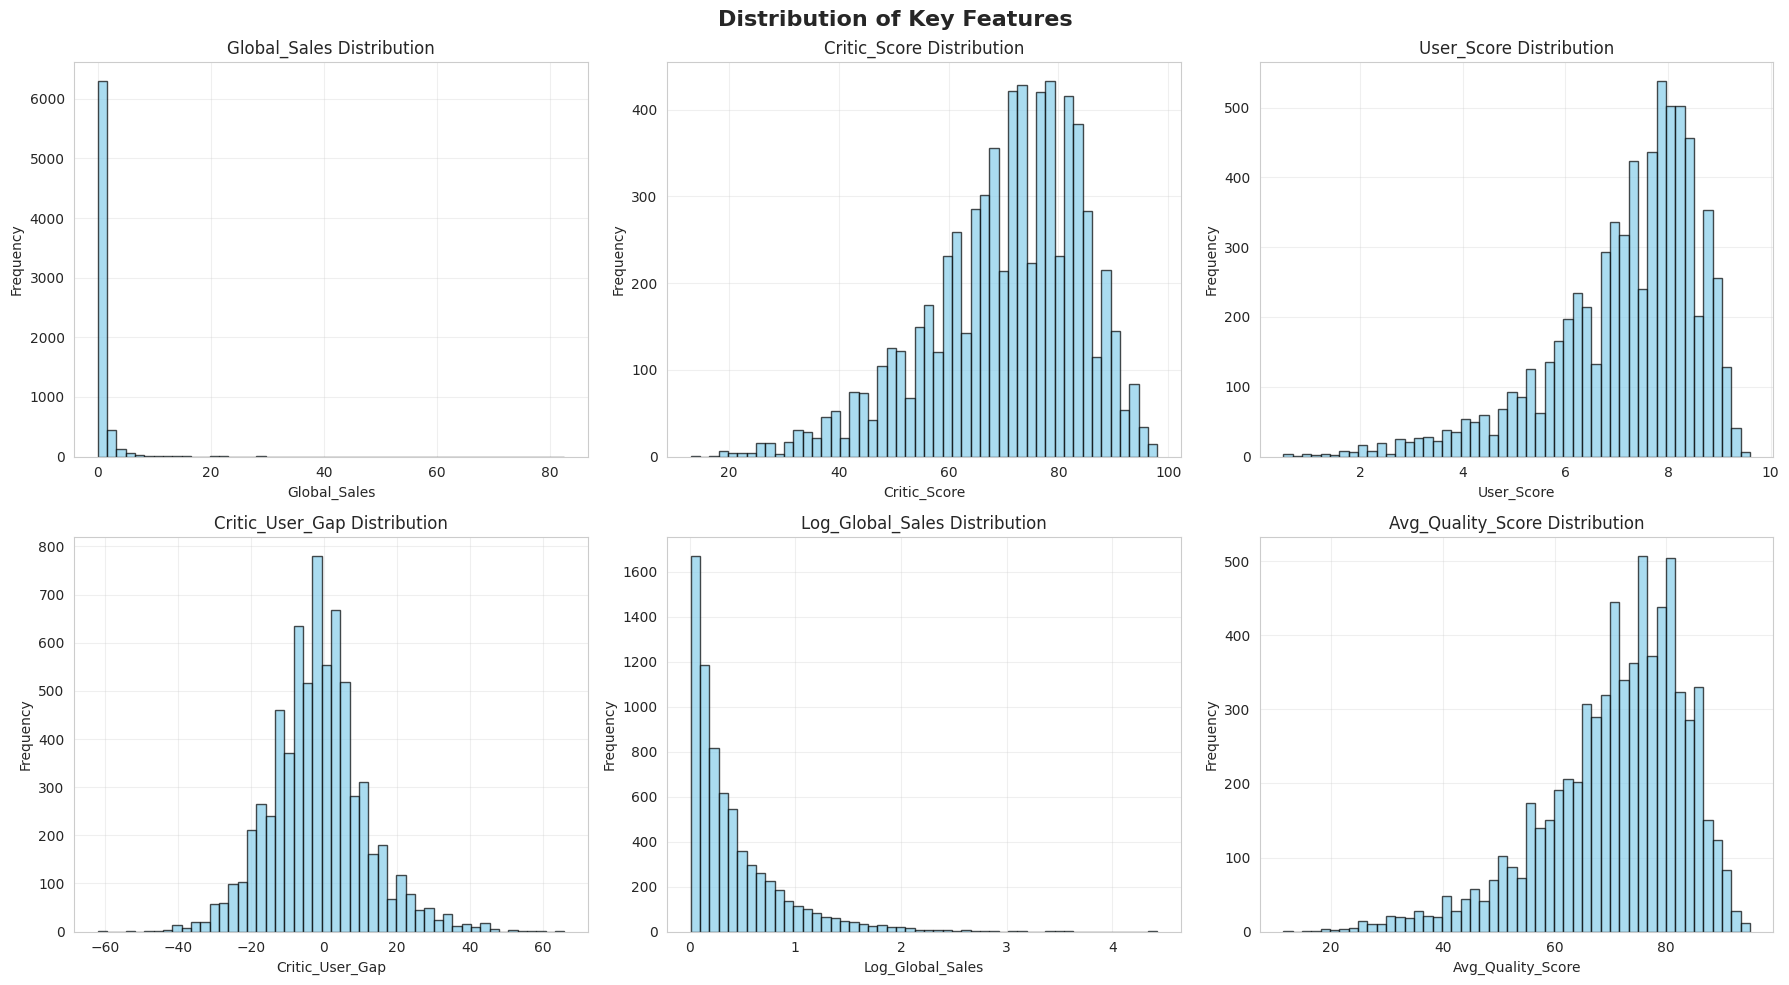


Correlation Analysis:


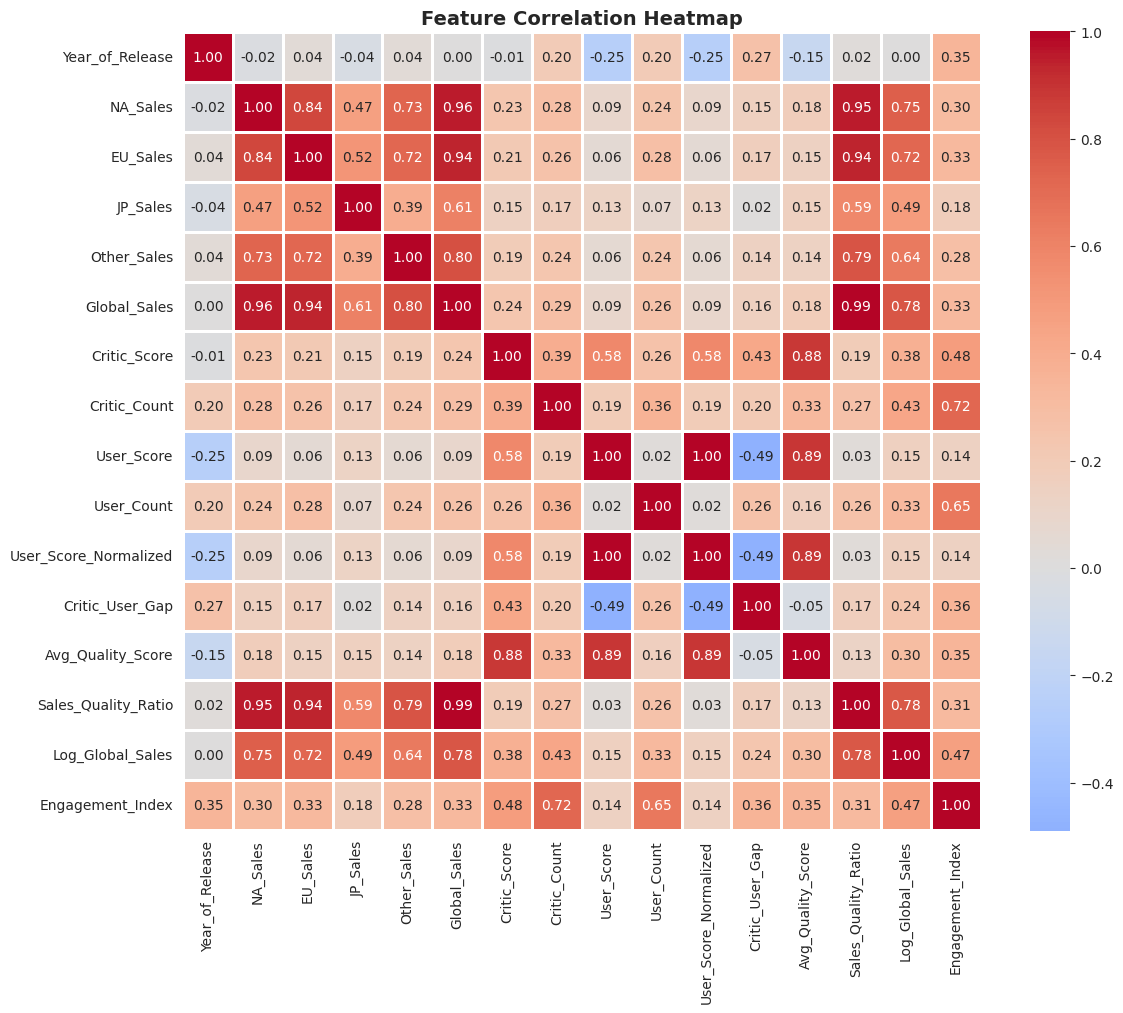

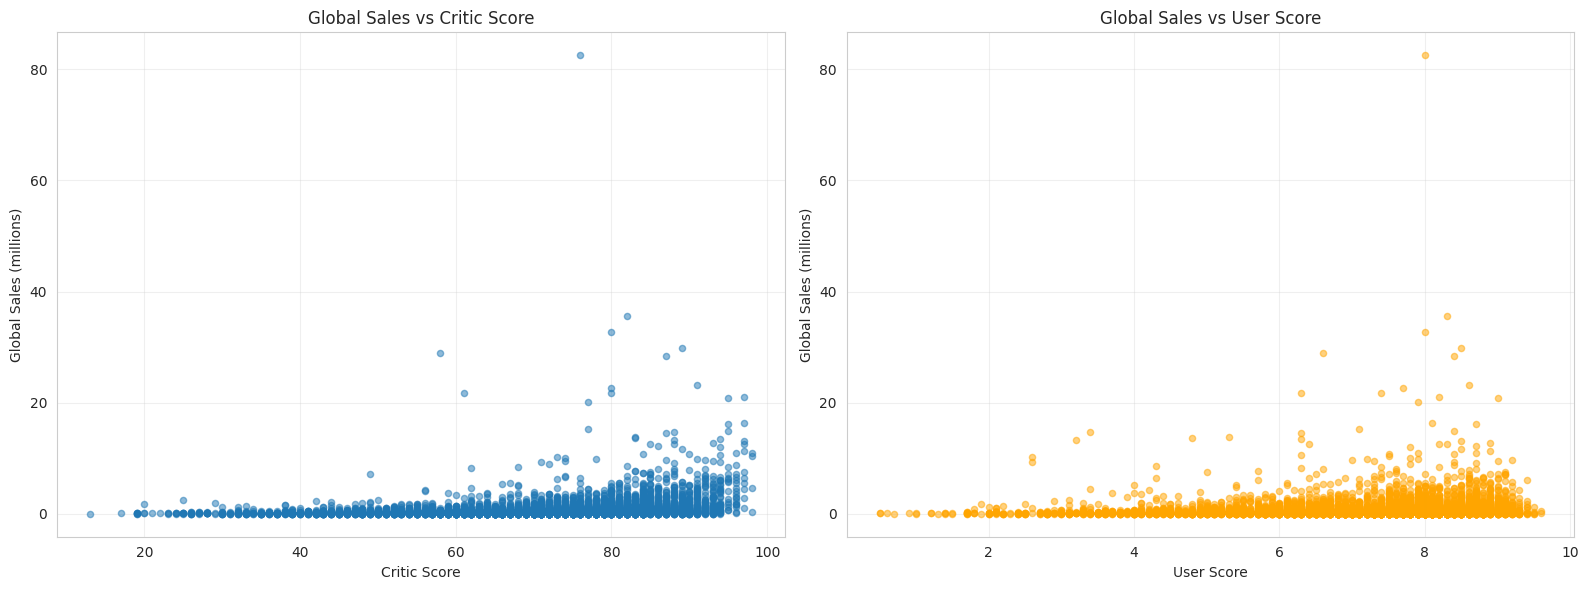

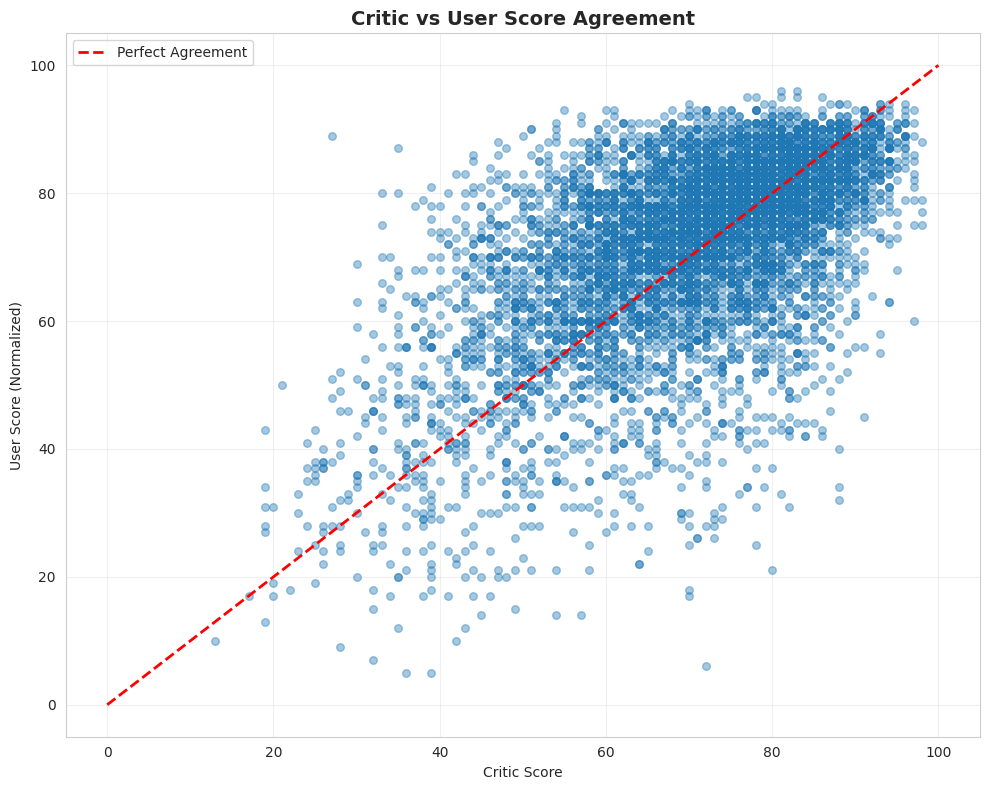


Correlation between Critic and User Scores: 0.581


In [ ]:
def visualize_eda(df):
    """
    Create comprehensive visualizations for exploratory data analysis
    """
    
    # 1. Distribution of key features
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Distribution of Key Features', fontsize=16, fontweight='bold')
    
    features_to_plot = ['Global_Sales', 'Critic_Score', 'User_Score', 
                        'Critic_User_Gap', 'Log_Global_Sales', 'Avg_Quality_Score']
    
    for idx, feature in enumerate(features_to_plot):
        if feature in df.columns:
            row, col = idx // 3, idx % 3
            axes[row, col].hist(df[feature].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
            axes[row, col].set_title(f'{feature} Distribution')
            axes[row, col].set_xlabel(feature)
            axes[row, col].set_ylabel('Frequency')
            axes[row, col].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 2. Correlation heatmap
    print("\nCorrelation Analysis:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1)
    plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 3. Sales vs Quality Scatter Plots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    if 'Global_Sales' in df.columns and 'Critic_Score' in df.columns:
        axes[0].scatter(df['Critic_Score'], df['Global_Sales'], alpha=0.5, s=20)
        axes[0].set_xlabel('Critic Score')
        axes[0].set_ylabel('Global Sales (millions)')
        axes[0].set_title('Global Sales vs Critic Score')
        axes[0].grid(alpha=0.3)
    
    if 'Global_Sales' in df.columns and 'User_Score' in df.columns:
        axes[1].scatter(df['User_Score'], df['Global_Sales'], alpha=0.5, s=20, color='orange')
        axes[1].set_xlabel('User Score')
        axes[1].set_ylabel('Global Sales (millions)')
        axes[1].set_title('Global Sales vs User Score')
        axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 4. Critic vs User Score Agreement
    if 'Critic_Score' in df.columns and 'User_Score_Normalized' in df.columns:
        plt.figure(figsize=(10, 8))
        plt.scatter(df['Critic_Score'], df['User_Score_Normalized'], alpha=0.4, s=30)
        plt.plot([0, 100], [0, 100], 'r--', linewidth=2, label='Perfect Agreement')
        plt.xlabel('Critic Score')
        plt.ylabel('User Score (Normalized)')
        plt.title('Critic vs User Score Agreement', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Calculate correlation
        corr = df[['Critic_Score', 'User_Score_Normalized']].corr().iloc[0, 1]
        print(f"\nCorrelation between Critic and User Scores: {corr:.3f}")

# Run EDA
try:
    visualize_eda(df_features)
except NameError:
    print("Dataset with features not available. Please run previous cells first.")

## Step 5: Feature Scaling and Dimensionality Reduction

Features selected for clustering:
  - Log_Global_Sales
  - Avg_Quality_Score
  - Critic_User_Gap
  - Sales_Quality_Ratio

Feature matrix shape: (7016, 4)
Features are now standardized (mean ≈ 0, std ≈ 1)

PCA Analysis:
Number of components: 3
Explained variance ratio: [0.48743471 0.26229937 0.20074343]
Cumulative explained variance: [0.48743471 0.74973408 0.9504775 ]


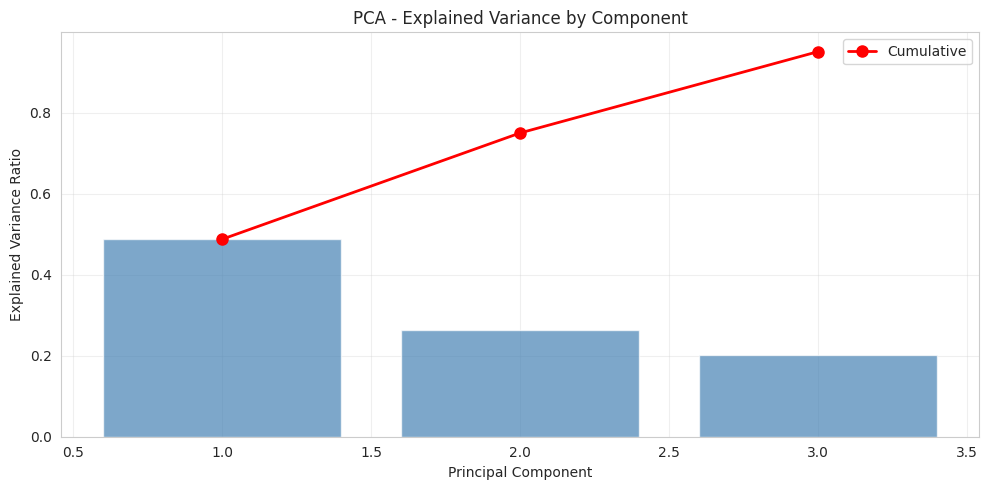


✓ Data preparation complete!
  Ready for clustering with 7016 games and 4 features


In [ ]:
def prepare_clustering_data(df):
    """
    Select features for clustering and apply standardization
    """
    
    # Select features for clustering
    # Focus on: Sales, Quality Scores, and their interactions
    clustering_features = [
        'Log_Global_Sales',        # Commercial success (log-transformed)
        'Avg_Quality_Score',       # Overall quality (critic + user average)
        'Critic_User_Gap',         # Agreement between critics and users
        'Sales_Quality_Ratio',     # Success relative to quality
    ]
    
    # Check which features are available
    available_features = [f for f in clustering_features if f in df.columns]
    
    print(f"Features selected for clustering:")
    for feat in available_features:
        print(f"  - {feat}")
    
    # Extract feature matrix
    X = df[available_features].values
    
    # Standardize features (mean=0, std=1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f"\nFeature matrix shape: {X_scaled.shape}")
    print(f"Features are now standardized (mean ≈ 0, std ≈ 1)")
    
    return X_scaled, available_features, scaler

# Apply PCA for visualization
def apply_pca(X_scaled, n_components=3):
    """
    Apply PCA for dimensionality reduction and visualization
    """
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    print(f"\nPCA Analysis:")
    print(f"Number of components: {n_components}")
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")
    
    # Visualize explained variance
    plt.figure(figsize=(10, 5))
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.7, color='steelblue')
    plt.plot(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), 
             'ro-', linewidth=2, markersize=8, label='Cumulative')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('PCA - Explained Variance by Component')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return X_pca, pca

# Prepare data for clustering
try:
    X_scaled, feature_names, scaler = prepare_clustering_data(df_features)
    X_pca, pca = apply_pca(X_scaled, n_components=3)
    
    print(f"\n✓ Data preparation complete!")
    print(f"  Ready for clustering with {X_scaled.shape[0]} games and {X_scaled.shape[1]} features")
    
except NameError:
    print("Dataset with features not available. Please run previous cells first.")

## Step 6: Determine Optimal Number of Clusters

Testing different numbers of clusters...
k=2: Silhouette=0.443, Davies-Bouldin=1.052
k=3: Silhouette=0.330, Davies-Bouldin=1.145
k=4: Silhouette=0.329, Davies-Bouldin=1.019
k=5: Silhouette=0.294, Davies-Bouldin=0.951
k=6: Silhouette=0.282, Davies-Bouldin=0.976
k=7: Silhouette=0.290, Davies-Bouldin=0.982
k=8: Silhouette=0.290, Davies-Bouldin=0.869
k=9: Silhouette=0.272, Davies-Bouldin=0.879
k=10: Silhouette=0.256, Davies-Bouldin=0.881


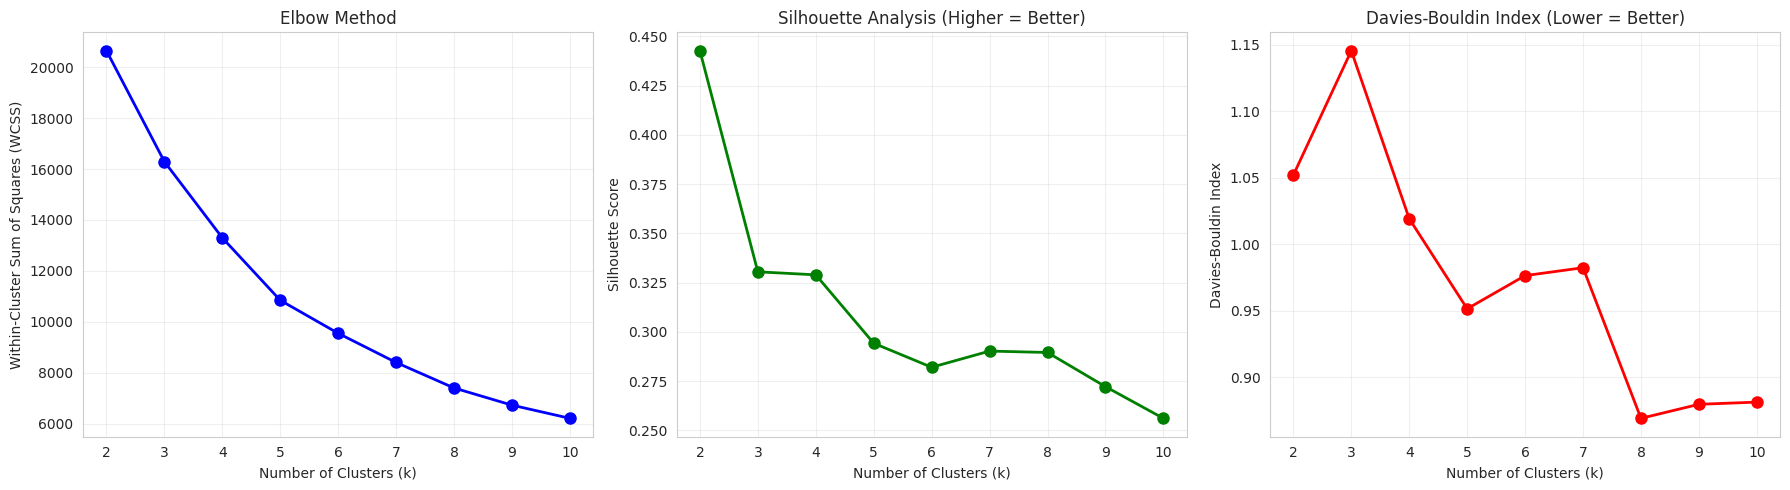


📊 Recommended number of clusters:
  - Based on Silhouette Score: k = 2
  - Based on Davies-Bouldin Index: k = 8
  - Suggested: k = 2 (can be adjusted based on domain knowledge)

Proceeding with k = 2 clusters

Hierarchical Clustering Dendrogram:


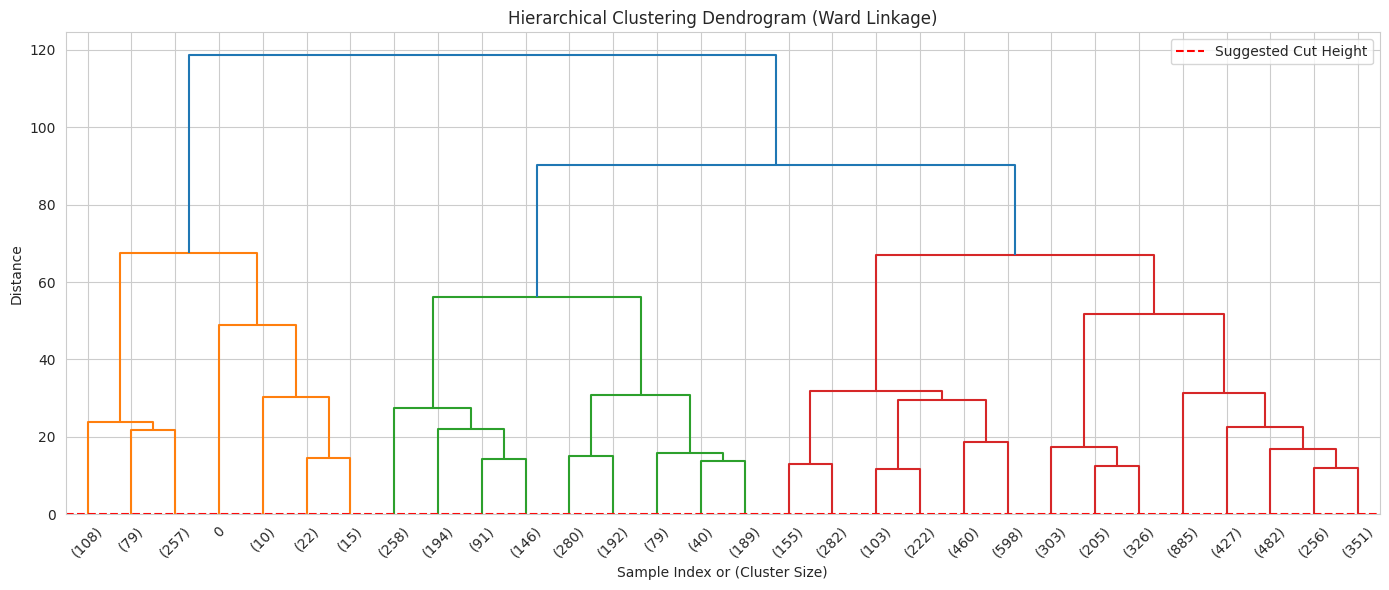

In [ ]:
def find_optimal_clusters(X, max_k=10):
    """
    Use multiple methods to determine optimal number of clusters:
    1. Elbow Method (Within-Cluster Sum of Squares)
    2. Silhouette Score
    3. Davies-Bouldin Index
    """
    
    # Test different numbers of clusters
    k_range = range(2, max_k + 1)
    
    wcss = []  # Within-cluster sum of squares
    silhouette_scores = []
    davies_bouldin_scores = []
    
    print("Testing different numbers of clusters...")
    
    for k in k_range:
        # Fit K-Means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        
        # Calculate metrics
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))
        davies_bouldin_scores.append(davies_bouldin_score(X, labels))
        
        print(f"k={k}: Silhouette={silhouette_scores[-1]:.3f}, Davies-Bouldin={davies_bouldin_scores[-1]:.3f}")
    
    # Visualize all methods
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Elbow Method
    axes[0].plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
    axes[0].set_xlabel('Number of Clusters (k)')
    axes[0].set_ylabel('Within-Cluster Sum of Squares (WCSS)')
    axes[0].set_title('Elbow Method')
    axes[0].grid(alpha=0.3)
    
    # 2. Silhouette Score (higher is better)
    axes[1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
    axes[1].set_xlabel('Number of Clusters (k)')
    axes[1].set_ylabel('Silhouette Score')
    axes[1].set_title('Silhouette Analysis (Higher = Better)')
    axes[1].grid(alpha=0.3)
    
    # 3. Davies-Bouldin Index (lower is better)
    axes[2].plot(k_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
    axes[2].set_xlabel('Number of Clusters (k)')
    axes[2].set_ylabel('Davies-Bouldin Index')
    axes[2].set_title('Davies-Bouldin Index (Lower = Better)')
    axes[2].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Recommend optimal k
    optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
    optimal_k_db = k_range[np.argmin(davies_bouldin_scores)]
    
    print(f"\n📊 Recommended number of clusters:")
    print(f"  - Based on Silhouette Score: k = {optimal_k_silhouette}")
    print(f"  - Based on Davies-Bouldin Index: k = {optimal_k_db}")
    print(f"  - Suggested: k = {optimal_k_silhouette} (can be adjusted based on domain knowledge)")
    
    return optimal_k_silhouette

# Hierarchical Clustering Dendrogram
def plot_dendrogram(X, method='ward'):
    """
    Create dendrogram to visualize hierarchical clustering
    """
    plt.figure(figsize=(14, 6))
    
    # Calculate linkage
    linkage_matrix = linkage(X, method=method)
    
    # Plot dendrogram
    dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
    plt.xlabel('Sample Index or (Cluster Size)')
    plt.ylabel('Distance')
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.axhline(y=np.median(linkage_matrix[:, 2]), color='r', linestyle='--', 
                label='Suggested Cut Height')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Find optimal number of clusters
try:
    optimal_k = find_optimal_clusters(X_scaled, max_k=10)
    print(f"\n" + "="*60)
    print(f"Proceeding with k = {optimal_k} clusters")
    print("="*60)
    
    # Also show dendrogram
    print("\nHierarchical Clustering Dendrogram:")
    plot_dendrogram(X_scaled)
    
except NameError:
    print("Scaled data not available. Please run previous cells first.")

## Step 7: Apply Clustering Algorithms

In [ ]:
def apply_clustering_algorithms(X, k=4):
    """
    Apply multiple clustering algorithms and compare results
    """
    
    print(f"Applying clustering algorithms with k = {k} clusters...\n")
    
    # 1. K-Means Clustering
    print("1. K-Means Clustering")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_kmeans = kmeans.fit_predict(X)
    
    silhouette_kmeans = silhouette_score(X, labels_kmeans)
    davies_bouldin_kmeans = davies_bouldin_score(X, labels_kmeans)
    calinski_kmeans = calinski_harabasz_score(X, labels_kmeans)
    
    print(f"   - Silhouette Score: {silhouette_kmeans:.4f}")
    print(f"   - Davies-Bouldin Index: {davies_bouldin_kmeans:.4f}")
    print(f"   - Calinski-Harabasz Score: {calinski_kmeans:.4f}")
    print(f"   - Cluster sizes: {np.bincount(labels_kmeans)}")
    
    # 2. Hierarchical Clustering (Agglomerative)
    print("\n2. Hierarchical Clustering (Agglomerative)")
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels_hierarchical = hierarchical.fit_predict(X)
    
    silhouette_hierarchical = silhouette_score(X, labels_hierarchical)
    davies_bouldin_hierarchical = davies_bouldin_score(X, labels_hierarchical)
    calinski_hierarchical = calinski_harabasz_score(X, labels_hierarchical)
    
    print(f"   - Silhouette Score: {silhouette_hierarchical:.4f}")
    print(f"   - Davies-Bouldin Index: {davies_bouldin_hierarchical:.4f}")
    print(f"   - Calinski-Harabasz Score: {calinski_hierarchical:.4f}")
    print(f"   - Cluster sizes: {np.bincount(labels_hierarchical)}")
    
    # 3. DBSCAN (Density-Based)
    print("\n3. DBSCAN Clustering")
    # Find optimal eps using k-distance graph
    from sklearn.neighbors import NearestNeighbors
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    distances = np.sort(distances[:, -1], axis=0)
    
    # Use elbow point as eps (approximate)
    eps = np.percentile(distances, 90)
    
    dbscan = DBSCAN(eps=eps, min_samples=k)
    labels_dbscan = dbscan.fit_predict(X)
    
    n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
    n_noise = list(labels_dbscan).count(-1)
    
    print(f"   - Number of clusters: {n_clusters_dbscan}")
    print(f"   - Number of noise points: {n_noise}")
    print(f"   - eps parameter: {eps:.4f}")
    
    if n_clusters_dbscan > 1:
        # Only calculate if there are multiple clusters
        valid_labels = labels_dbscan[labels_dbscan != -1]
        valid_X = X[labels_dbscan != -1]
        if len(set(valid_labels)) > 1:
            silhouette_dbscan = silhouette_score(valid_X, valid_labels)
            print(f"   - Silhouette Score (excluding noise): {silhouette_dbscan:.4f}")
    
    # Summary comparison
    print("\n" + "="*60)
    print("ALGORITHM COMPARISON SUMMARY")
    print("="*60)
    print(f"{'Algorithm':<20} {'Silhouette':<15} {'Davies-Bouldin':<20} {'Calinski-Harabasz':<20}")
    print("-"*75)
    print(f"{'K-Means':<20} {silhouette_kmeans:<15.4f} {davies_bouldin_kmeans:<20.4f} {calinski_kmeans:<20.4f}")
    print(f"{'Hierarchical':<20} {silhouette_hierarchical:<15.4f} {davies_bouldin_hierarchical:<20.4f} {calinski_hierarchical:<20.4f}")
    print("="*75)
    print("\nNote: Higher Silhouette and Calinski-Harabasz, Lower Davies-Bouldin is better")
    
    # Select best algorithm (K-Means typically works well for this type of data)
    best_labels = labels_kmeans
    best_model = kmeans
    best_algorithm = "K-Means"
    
    print(f"\n✓ Selected algorithm: {best_algorithm}")
    
    return best_labels, best_model, best_algorithm, labels_kmeans, labels_hierarchical

# Apply clustering
try:
    # Use the optimal k determined earlier (default to 4 if not found)
    k_clusters = optimal_k if 'optimal_k' in locals() else 4
    
    cluster_labels, model, algorithm_name, kmeans_labels, hierarchical_labels = apply_clustering_algorithms(
        X_scaled, k=k_clusters
    )
    
    # Add cluster labels to the dataframe
    df_features['Cluster'] = cluster_labels
    df_features['Cluster_KMeans'] = kmeans_labels
    df_features['Cluster_Hierarchical'] = hierarchical_labels
    
    print(f"\n✓ Clustering complete! Cluster labels added to dataset.")
    
except NameError:
    print("Scaled data not available. Please run previous cells first.")

Applying clustering algorithms with k = 2 clusters...

1. K-Means Clustering
   - Silhouette Score: 0.4427
   - Davies-Bouldin Index: 1.0519
   - Calinski-Harabasz Score: 2518.8552
   - Cluster sizes: [6064  952]

2. Hierarchical Clustering (Agglomerative)
   - Silhouette Score: 0.5310
   - Davies-Bouldin Index: 0.8843
   - Calinski-Harabasz Score: 2345.3934
   - Cluster sizes: [6524  492]

3. DBSCAN Clustering
   - Number of clusters: 241
   - Number of noise points: 701
   - eps parameter: 0.1958
   - Silhouette Score (excluding noise): -0.3293

ALGORITHM COMPARISON SUMMARY
Algorithm            Silhouette      Davies-Bouldin       Calinski-Harabasz   
---------------------------------------------------------------------------
K-Means              0.4427          1.0519               2518.8552           
Hierarchical         0.5310          0.8843               2345.3934           

Note: Higher Silhouette and Calinski-Harabasz, Lower Davies-Bouldin is better

✓ Selected algorithm: K-

## Step 8: Cluster Interpretation and Archetype Naming

In [ ]:
def interpret_clusters(df, cluster_col='Cluster'):
    """
    Analyze cluster characteristics and assign meaningful archetype names
    """
    
    print("="*80)
    print("CLUSTER ANALYSIS & ARCHETYPE NAMING")
    print("="*80)
    
    # Features to analyze
    analysis_features = ['Global_Sales', 'Critic_Score', 'User_Score', 
                        'Avg_Quality_Score', 'Critic_User_Gap', 'Sales_Quality_Ratio']
    
    # Check which features are available
    available_features = [f for f in analysis_features if f in df.columns]
    
    # Calculate cluster statistics
    cluster_stats = df.groupby(cluster_col)[available_features].agg(['mean', 'median', 'std'])
    
    print(f"\nCluster Statistics (Mean Values):")
    print("-"*80)
    display(df.groupby(cluster_col)[available_features].mean().round(3))
    
    # Assign archetype names based on characteristics
    archetypes = {}
    
    for cluster_id in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster_id]
        
        avg_sales = cluster_data['Global_Sales'].mean() if 'Global_Sales' in cluster_data.columns else 0
        avg_quality = cluster_data['Avg_Quality_Score'].mean() if 'Avg_Quality_Score' in cluster_data.columns else 0
        critic_score = cluster_data['Critic_Score'].mean() if 'Critic_Score' in cluster_data.columns else 0
        user_score = cluster_data['User_Score'].mean() if 'User_Score' in cluster_data.columns else 0
        critic_user_gap = cluster_data['Critic_User_Gap'].mean() if 'Critic_User_Gap' in cluster_data.columns else 0
        
        # Determine archetype based on sales and quality
        if avg_sales > df['Global_Sales'].quantile(0.75) and avg_quality > df['Avg_Quality_Score'].quantile(0.75):
            archetype = "🏆 Critically Acclaimed Blockbusters"
            description = "High sales + High quality - The gold standard"
        
        elif avg_sales < df['Global_Sales'].quantile(0.25) and avg_quality > df['Avg_Quality_Score'].quantile(0.75):
            archetype = "💎 Underrated Gems"
            description = "Low sales + High quality - Hidden masterpieces"
        
        elif avg_sales > df['Global_Sales'].quantile(0.75) and avg_quality < df['Avg_Quality_Score'].quantile(0.25):
            archetype = "💰 Commercial Hits"
            description = "High sales + Low quality - Popular but criticized"
        
        elif avg_sales < df['Global_Sales'].quantile(0.25) and avg_quality < df['Avg_Quality_Score'].quantile(0.25):
            archetype = "📉 Unsuccessful Titles"
            description = "Low sales + Low quality - Market failures"
        
        elif critic_user_gap > df['Critic_User_Gap'].quantile(0.75):
            archetype = "🎭 Critic Favorites"
            description = "Critics love them more than users"
        
        elif critic_user_gap < df['Critic_User_Gap'].quantile(0.25):
            archetype = "👥 Fan Favorites"
            description = "Users love them more than critics"
        
        else:
            archetype = "⚖️ Balanced Performers"
            description = "Moderate sales and quality"
        
        archetypes[cluster_id] = {
            'name': archetype,
            'description': description,
            'size': len(cluster_data),
            'avg_sales': avg_sales,
            'avg_quality': avg_quality,
            'critic_score': critic_score,
            'user_score': user_score,
            'critic_user_gap': critic_user_gap
        }
    
    # Display archetype profiles
    print("\n" + "="*80)
    print("GAME ARCHETYPES DISCOVERED")
    print("="*80)
    
    for cluster_id, info in archetypes.items():
        print(f"\n{'Cluster ' + str(cluster_id):=^80}")
        print(f"{info['name']:^80}")
        print(f"{info['description']:^80}")
        print("-"*80)
        print(f"  Size: {info['size']} games")
        print(f"  Avg Global Sales: {info['avg_sales']:.2f} million")
        print(f"  Avg Quality Score: {info['avg_quality']:.2f}/100")
        print(f"  Avg Critic Score: {info['critic_score']:.2f}/100")
        print(f"  Avg User Score: {info['user_score']:.2f}/10")
        print(f"  Critic-User Gap: {info['critic_user_gap']:.2f}")
        
        # Show some example games
        if 'Name' in df.columns:
            print(f"\n  Example Games:")
            examples = cluster_data.nlargest(3, 'Global_Sales')['Name'].values if 'Global_Sales' in cluster_data.columns else cluster_data.head(3)['Name'].values
            for i, game in enumerate(examples, 1):
                print(f"    {i}. {game}")
    
    print("\n" + "="*80)
    
    return archetypes

# Interpret clusters
try:
    archetypes = interpret_clusters(df_features)
    print("\n✓ Cluster interpretation complete!")
    
except NameError:
    print("Clustered dataset not available. Please run previous cells first.")

CLUSTER ANALYSIS & ARCHETYPE NAMING

Cluster Statistics (Mean Values):
--------------------------------------------------------------------------------


,Global_Sales,Critic_Score,User_Score,Avg_Quality_Score,Critic_User_Gap,Sales_Quality_Ratio
Cluster,,,,,,
0,0.345,68.319,7.118,69.749,-2.859,0.005
1,3.459,82.559,7.595,79.257,6.604,0.043



GAME ARCHETYPES DISCOVERED

===================================Cluster 0====================================
                             ⚖️ Balanced Performers                             
                           Moderate sales and quality                           
--------------------------------------------------------------------------------
  Size: 6064 games
  Avg Global Sales: 0.34 million
  Avg Quality Score: 69.75/100
  Avg Critic Score: 68.32/100
  Avg User Score: 7.12/10
  Critic-User Gap: -2.86

  Example Games:
    1. Wii Sports
    2. Mario Kart Wii
    3. Wii Sports Resort

===================================Cluster 1====================================
                               🎭 Critic Favorites                               
                       Critics love them more than users                        
--------------------------------------------------------------------------------
  Size: 952 games
  Avg Global Sales: 3.46 million
  Avg Quality Score: 79.

## Step 9: Cluster Visualization

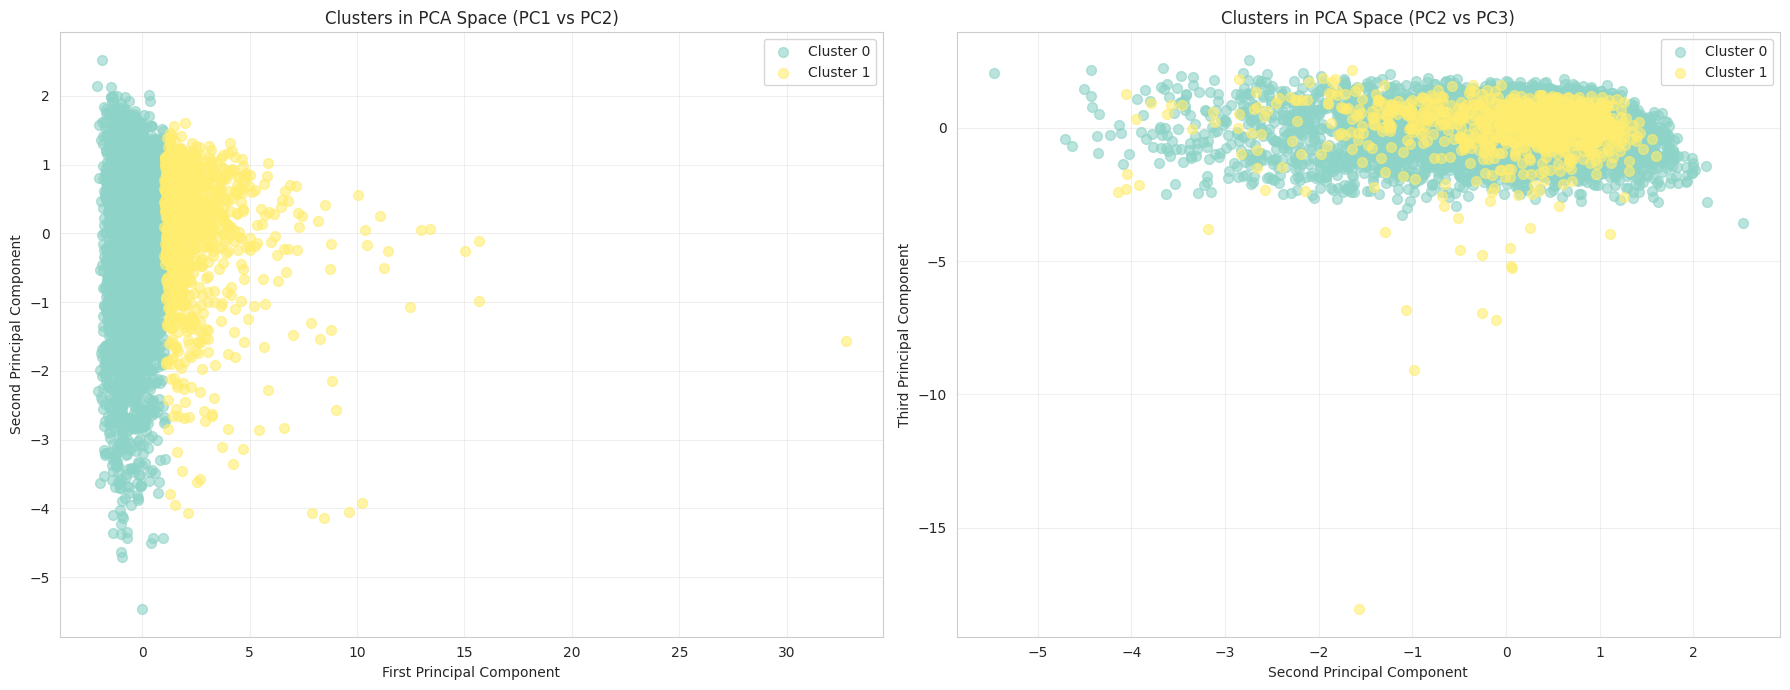

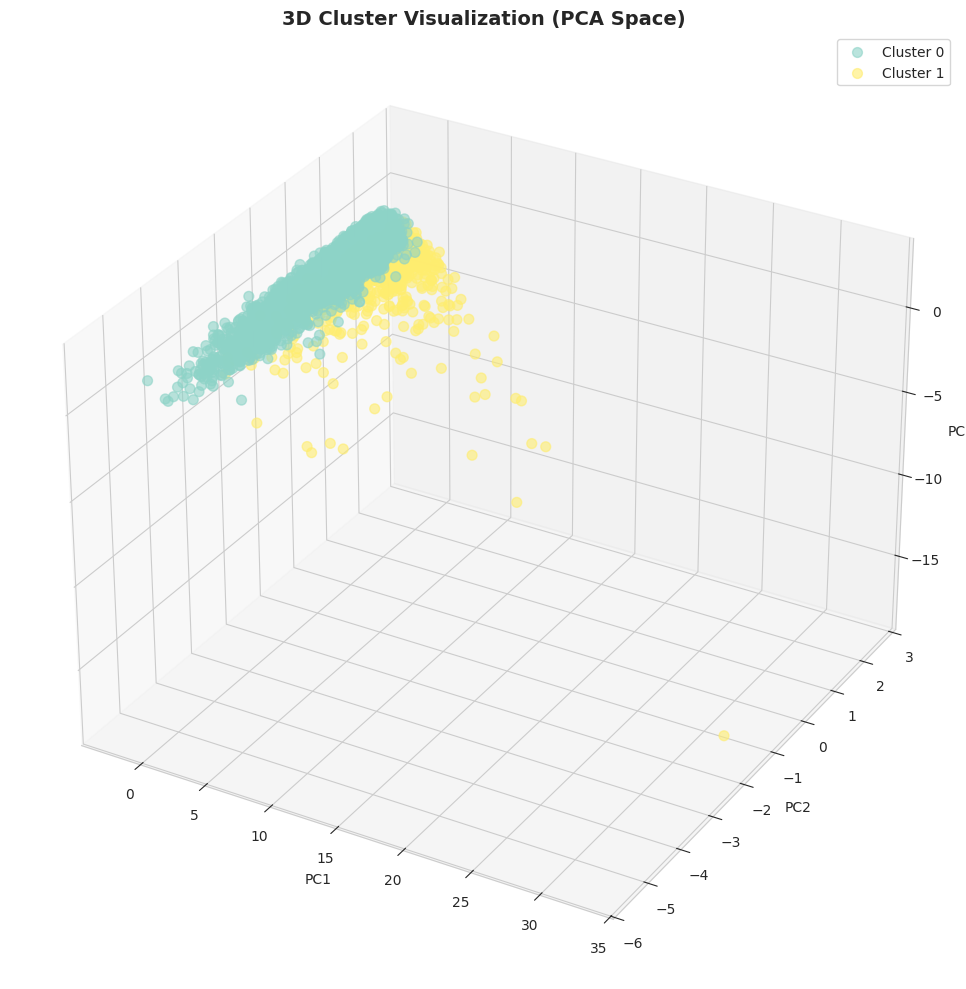

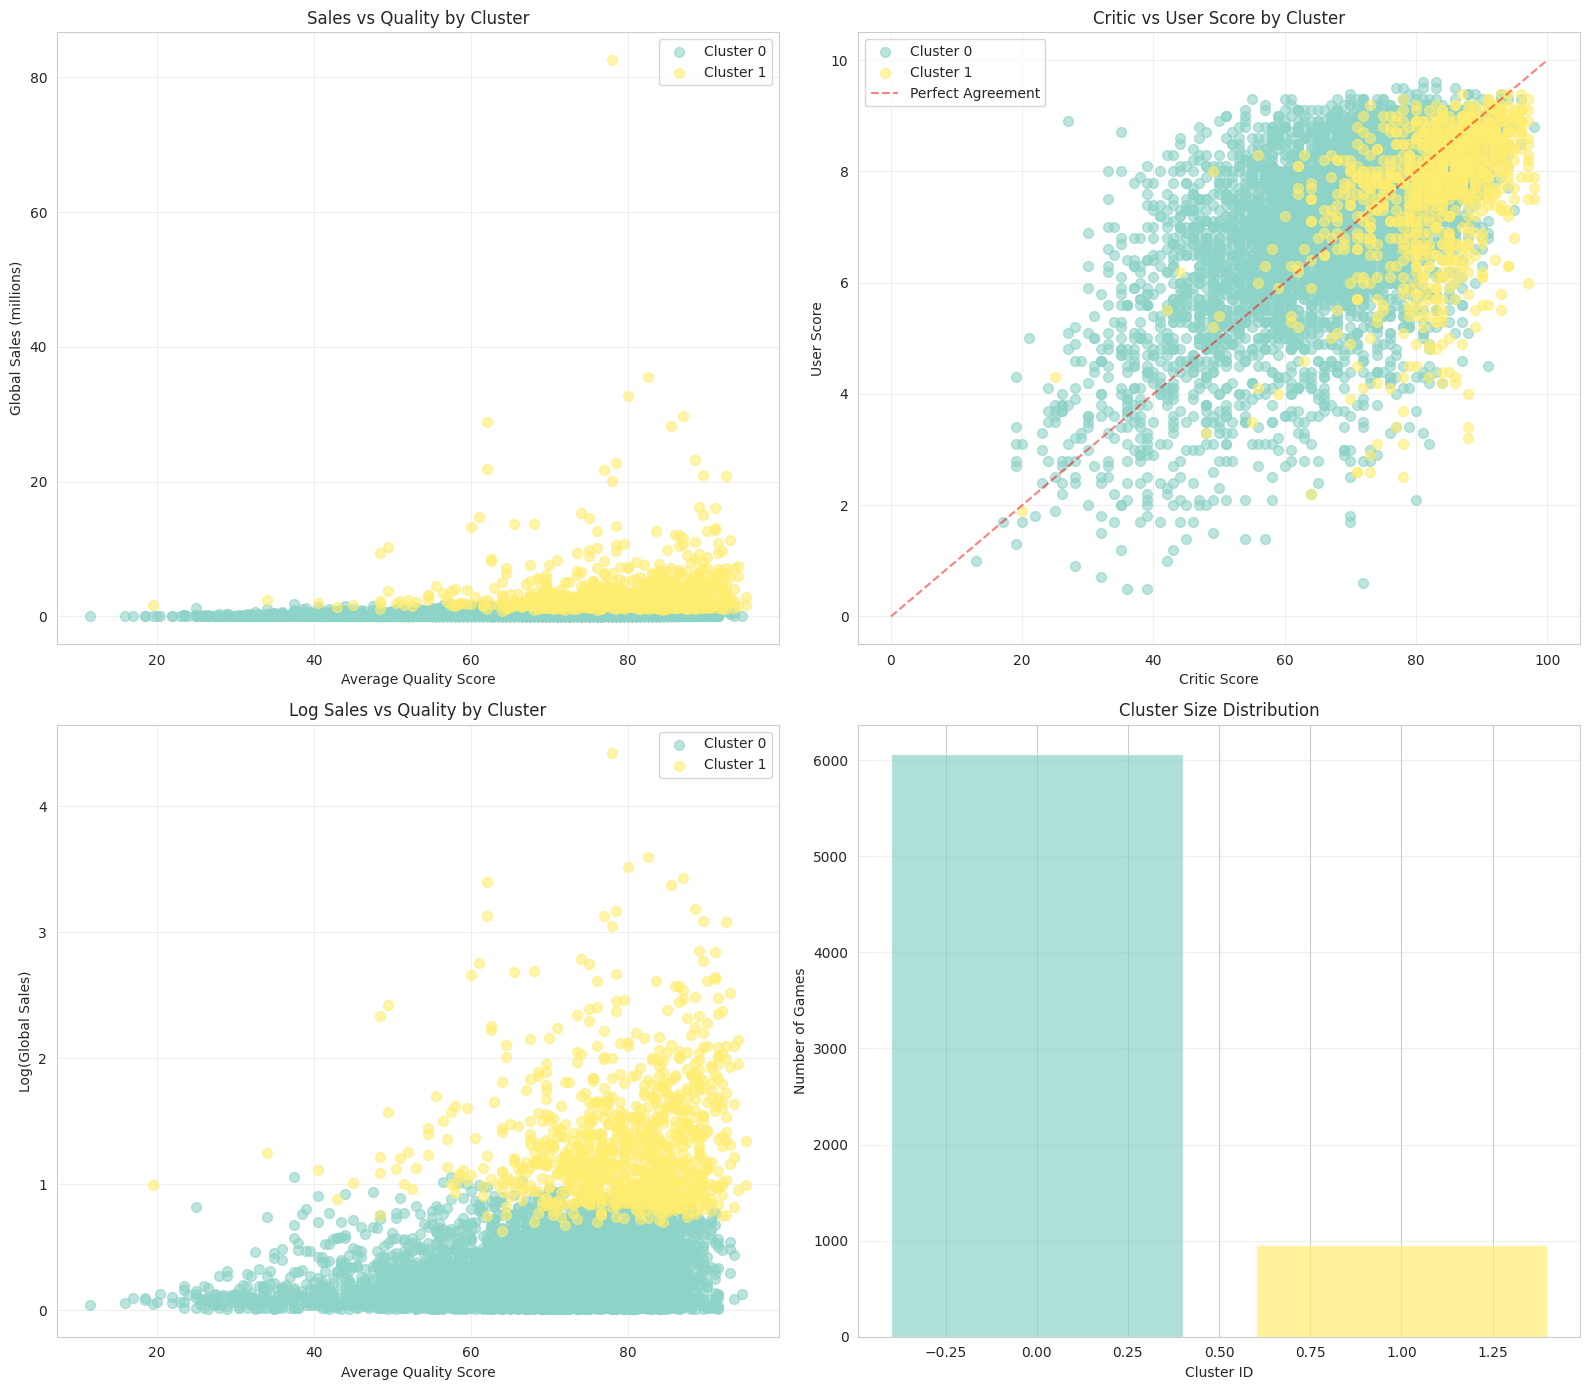

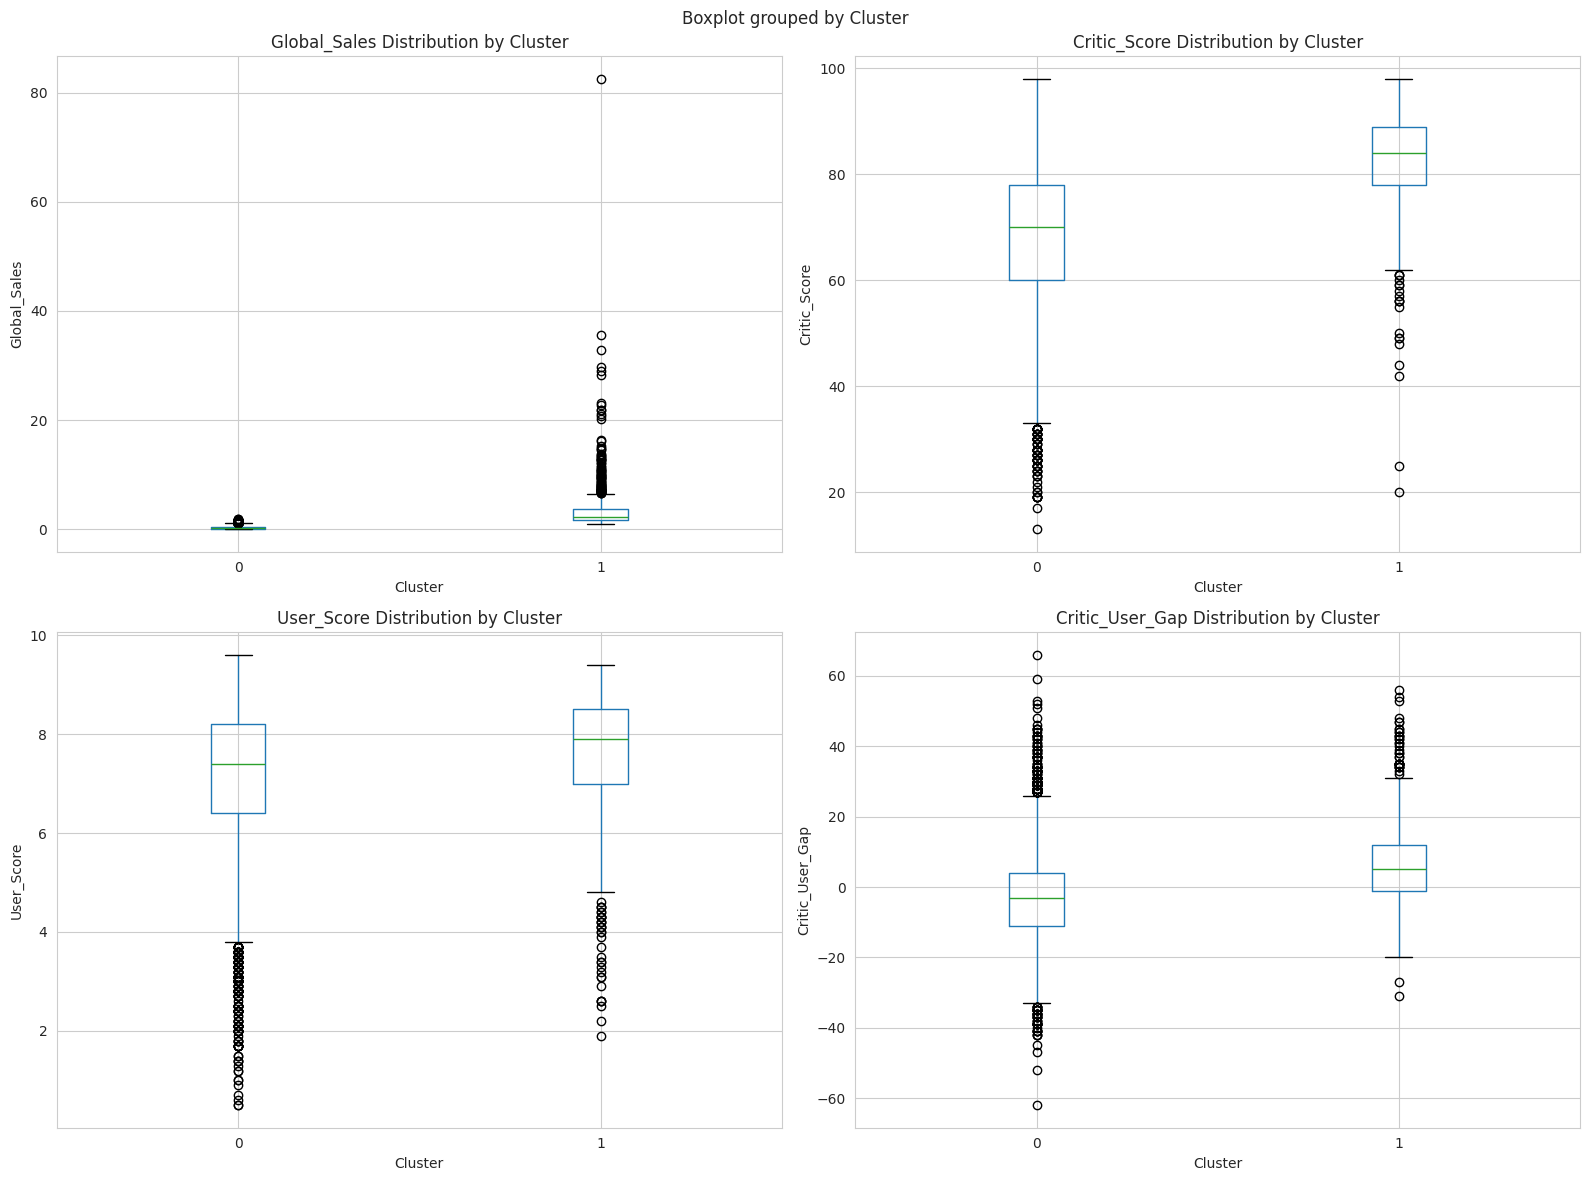

✓ Cluster visualization complete!


In [ ]:
def visualize_clusters(df, X_pca, cluster_col='Cluster'):
    """
    Create comprehensive visualizations of the clusters
    """
    
    # Color palette
    colors = plt.cm.Set3(np.linspace(0, 1, len(df[cluster_col].unique())))
    
    # 1. 2D PCA Visualization
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # PC1 vs PC2
    for cluster_id in sorted(df[cluster_col].unique()):
        mask = df[cluster_col] == cluster_id
        axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                       label=f'Cluster {cluster_id}', alpha=0.6, s=50, 
                       color=colors[cluster_id])
    
    axes[0].set_xlabel('First Principal Component')
    axes[0].set_ylabel('Second Principal Component')
    axes[0].set_title('Clusters in PCA Space (PC1 vs PC2)')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # PC2 vs PC3
    for cluster_id in sorted(df[cluster_col].unique()):
        mask = df[cluster_col] == cluster_id
        axes[1].scatter(X_pca[mask, 1], X_pca[mask, 2], 
                       label=f'Cluster {cluster_id}', alpha=0.6, s=50, 
                       color=colors[cluster_id])
    
    axes[1].set_xlabel('Second Principal Component')
    axes[1].set_ylabel('Third Principal Component')
    axes[1].set_title('Clusters in PCA Space (PC2 vs PC3)')
    axes[1].legend()
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 2. 3D Visualization
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    for cluster_id in sorted(df[cluster_col].unique()):
        mask = df[cluster_col] == cluster_id
        ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2],
                  label=f'Cluster {cluster_id}', alpha=0.6, s=50,
                  color=colors[cluster_id])
    
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('3D Cluster Visualization (PCA Space)', fontsize=14, fontweight='bold')
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    # 3. Feature Space Visualization (Sales vs Quality)
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    
    # Sales vs Avg Quality Score
    if 'Global_Sales' in df.columns and 'Avg_Quality_Score' in df.columns:
        for cluster_id in sorted(df[cluster_col].unique()):
            mask = df[cluster_col] == cluster_id
            axes[0, 0].scatter(df[mask]['Avg_Quality_Score'], df[mask]['Global_Sales'],
                             label=f'Cluster {cluster_id}', alpha=0.6, s=50,
                             color=colors[cluster_id])
        axes[0, 0].set_xlabel('Average Quality Score')
        axes[0, 0].set_ylabel('Global Sales (millions)')
        axes[0, 0].set_title('Sales vs Quality by Cluster')
        axes[0, 0].legend()
        axes[0, 0].grid(alpha=0.3)
    
    # Critic Score vs User Score
    if 'Critic_Score' in df.columns and 'User_Score' in df.columns:
        for cluster_id in sorted(df[cluster_col].unique()):
            mask = df[cluster_col] == cluster_id
            axes[0, 1].scatter(df[mask]['Critic_Score'], df[mask]['User_Score'],
                             label=f'Cluster {cluster_id}', alpha=0.6, s=50,
                             color=colors[cluster_id])
        axes[0, 1].plot([0, 100], [0, 10], 'r--', alpha=0.5, label='Perfect Agreement')
        axes[0, 1].set_xlabel('Critic Score')
        axes[0, 1].set_ylabel('User Score')
        axes[0, 1].set_title('Critic vs User Score by Cluster')
        axes[0, 1].legend()
        axes[0, 1].grid(alpha=0.3)
    
    # Log Sales vs Quality
    if 'Log_Global_Sales' in df.columns and 'Avg_Quality_Score' in df.columns:
        for cluster_id in sorted(df[cluster_col].unique()):
            mask = df[cluster_col] == cluster_id
            axes[1, 0].scatter(df[mask]['Avg_Quality_Score'], df[mask]['Log_Global_Sales'],
                             label=f'Cluster {cluster_id}', alpha=0.6, s=50,
                             color=colors[cluster_id])
        axes[1, 0].set_xlabel('Average Quality Score')
        axes[1, 0].set_ylabel('Log(Global Sales)')
        axes[1, 0].set_title('Log Sales vs Quality by Cluster')
        axes[1, 0].legend()
        axes[1, 0].grid(alpha=0.3)
    
    # Cluster Size Distribution
    cluster_sizes = df[cluster_col].value_counts().sort_index()
    axes[1, 1].bar(cluster_sizes.index, cluster_sizes.values, color=colors, alpha=0.7)
    axes[1, 1].set_xlabel('Cluster ID')
    axes[1, 1].set_ylabel('Number of Games')
    axes[1, 1].set_title('Cluster Size Distribution')
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 4. Box plots for each feature by cluster
    numeric_features = ['Global_Sales', 'Critic_Score', 'User_Score', 'Critic_User_Gap']
    available_features = [f for f in numeric_features if f in df.columns]
    
    if available_features:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes = axes.flatten()
        
        for idx, feature in enumerate(available_features):
            if idx < 4:
                df.boxplot(column=feature, by=cluster_col, ax=axes[idx])
                axes[idx].set_xlabel('Cluster')
                axes[idx].set_ylabel(feature)
                axes[idx].set_title(f'{feature} Distribution by Cluster')
                plt.sca(axes[idx])
                plt.xticks(rotation=0)
        
        plt.tight_layout()
        plt.show()

# Visualize clusters
try:
    visualize_clusters(df_features, X_pca)
    print("✓ Cluster visualization complete!")
    
except NameError:
    print("Required data not available. Please run previous cells first.")

## Step 10: Final Analysis & Conclusions

In [ ]:
def generate_final_report(df, cluster_col='Cluster'):
    """
    Generate comprehensive final report and insights
    """
    
    print("="*80)
    print("FINAL ANALYSIS & KEY INSIGHTS")
    print("="*80)
    
    # 1. Overall Statistics
    print("\n1. DATASET OVERVIEW")
    print("-"*80)
    print(f"Total games analyzed: {len(df)}")
    print(f"Number of clusters: {df[cluster_col].nunique()}")
    print(f"Date of analysis: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")
    
    # 2. Key Findings
    print("\n2. KEY FINDINGS")
    print("-"*80)
    
    if 'Critic_Score' in df.columns and 'User_Score_Normalized' in df.columns:
        correlation = df[['Critic_Score', 'User_Score_Normalized']].corr().iloc[0, 1]
        print(f"✓ Critic-User Score Correlation: {correlation:.3f}")
        if correlation > 0.7:
            print("  → Strong positive correlation: Critics and users generally agree")
        elif correlation > 0.4:
            print("  → Moderate correlation: Some agreement between critics and users")
        else:
            print("  → Weak correlation: Significant discrepancy between critics and users")
    
    if 'Global_Sales' in df.columns and 'Avg_Quality_Score' in df.columns:
        sales_quality_corr = df[['Global_Sales', 'Avg_Quality_Score']].corr().iloc[0, 1]
        print(f"\n✓ Sales-Quality Correlation: {sales_quality_corr:.3f}")
        if sales_quality_corr > 0.5:
            print("  → Higher quality games tend to sell better")
        elif sales_quality_corr > 0:
            print("  → Weak positive relationship between quality and sales")
        else:
            print("  → Quality doesn't guarantee commercial success")
    
    # 3. Cluster Insights
    print("\n3. DISCOVERED ARCHETYPES")
    print("-"*80)
    
    for cluster_id in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster_id]
        size_pct = (len(cluster_data) / len(df)) * 100
        
        print(f"\nCluster {cluster_id} ({len(cluster_data)} games, {size_pct:.1f}% of dataset)")
        
        if 'Global_Sales' in cluster_data.columns:
            print(f"  Avg Sales: {cluster_data['Global_Sales'].mean():.2f}M")
        if 'Avg_Quality_Score' in cluster_data.columns:
            print(f"  Avg Quality: {cluster_data['Avg_Quality_Score'].mean():.2f}/100")
        if 'Critic_User_Gap' in cluster_data.columns:
            print(f"  Critic-User Gap: {cluster_data['Critic_User_Gap'].mean():.2f}")
    
    # 4. Business Insights
    print("\n4. BUSINESS INSIGHTS")
    print("-"*80)
    print("✓ Use archetypes to:")
    print("  • Identify market gaps and opportunities")
    print("  • Understand what makes games commercially successful")
    print("  • Discover undervalued games (Underrated Gems)")
    print("  • Learn from successful patterns (Critically Acclaimed Blockbusters)")
    print("  • Avoid pitfalls (analyze unsuccessful clusters)")
    
    # 5. Recommendations
    print("\n5. RECOMMENDATIONS")
    print("-"*80)
    print("For Game Developers:")
    print("  • Study games in 'Critically Acclaimed Blockbusters' cluster")
    print("  • Address critic-user discrepancies in your genre")
    print("  • Quality matters, but marketing is also crucial")
    
    print("\nFor Gamers:")
    print("  • Explore 'Underrated Gems' for high-quality hidden titles")
    print("  • Consider both critic and user scores for balanced view")
    
    print("\nFor Investors:")
    print("  • Focus on patterns that combine quality and sales potential")
    print("  • Monitor critic-user alignment as indicator of market reception")
    
    print("\n" + "="*80)
    print("ANALYSIS COMPLETE")
    print("="*80)

# Generate final report
try:
    generate_final_report(df_features)
    
    print("\n✅ PROJECT COMPLETE!")
    print("\nNext Steps:")
    print("  1. Download the dataset from Kaggle")
    print("  2. Run all cells in sequence to see full analysis")
    print("  3. Adjust number of clusters (k) based on your needs")
    print("  4. Export results for further use")
    
except NameError:
    print("Clustered data not available. Please run previous cells first.")

FINAL ANALYSIS & KEY INSIGHTS

1. DATASET OVERVIEW
--------------------------------------------------------------------------------
Total games analyzed: 7016
Number of clusters: 2
Date of analysis: 2026-02-03 19:53:41

2. KEY FINDINGS
--------------------------------------------------------------------------------
✓ Critic-User Score Correlation: 0.581
  → Moderate correlation: Some agreement between critics and users

✓ Sales-Quality Correlation: 0.181
  → Weak positive relationship between quality and sales

3. DISCOVERED ARCHETYPES
--------------------------------------------------------------------------------

Cluster 0 (6064 games, 86.4% of dataset)
  Avg Sales: 0.34M
  Avg Quality: 69.75/100
  Critic-User Gap: -2.86

Cluster 1 (952 games, 13.6% of dataset)
  Avg Sales: 3.46M
  Avg Quality: 79.26/100
  Critic-User Gap: 6.60

4. BUSINESS INSIGHTS
--------------------------------------------------------------------------------
✓ Use archetypes to:
  • Identify market gaps and oppo

## Optional: Export Results

In [ ]:
# Export clustered data to CSV
try:
    output_file = 'video_games_clustered_results.csv'
    
    # Select important columns for export
    export_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
                   'Global_Sales', 'Critic_Score', 'User_Score',
                   'Avg_Quality_Score', 'Critic_User_Gap', 'Cluster']
    
    # Filter to existing columns
    export_cols = [col for col in export_cols if col in df_features.columns]
    
    df_export = df_features[export_cols].copy()
    df_export.to_csv(output_file, index=False)
    
    print(f"✓ Results exported to '{output_file}'")
    print(f"  Columns exported: {', '.join(export_cols)}")
    print(f"  Total rows: {len(df_export)}")
    
except NameError:
    print("Data not available for export. Please run all previous cells first.")

✓ Results exported to 'video_games_clustered_results.csv'
  Columns exported: Name, Platform, Year_of_Release, Genre, Global_Sales, Critic_Score, User_Score, Avg_Quality_Score, Critic_User_Gap, Cluster
  Total rows: 7016


---

## 📋 Instructions to Run This Project

### Run All Cells
- Click "Run All" or execute cells sequentially from top to bottom
- The analysis will automatically:
  - Load and clean the data
  - Engineer meaningful features
  - Determine optimal number of clusters
  - Apply multiple clustering algorithms
  - Generate visualizations and insights

### Key Features of This Analysis

**Feature Engineering:**
- Log-transformed sales (handles skewness)
- Average quality score (critic + user consensus)
- Critic-user gap (agreement measure)
- Sales-quality ratio (success relative to quality)

**Clustering Methods:**
- K-Means (partition-based)
- Hierarchical Clustering (dendrogram-based)
- DBSCAN (density-based, detects outliers)

**Evaluation Metrics:**
- Silhouette Score (higher = better separation)
- Davies-Bouldin Index (lower = better clustering)
- Calinski-Harabasz Score (higher = better defined clusters)

### Expected Archetypes

The model will discover archetypes such as:
- 🏆 **Critically Acclaimed Blockbusters**: High sales + High quality
- 💎 **Underrated Gems**: Low sales + High quality
- 💰 **Commercial Hits**: High sales + Lower quality
- 📉 **Unsuccessful Titles**: Low sales + Low quality
- 🎭 **Critic Favorites**: Critics love more than users
- 👥 **Fan Favorites**: Users love more than critics

### Customization Options

You can adjust:
- `max_k` in Step 6 to test more cluster numbers
- `k_clusters` in Step 7 to change the final number of clusters
- Features in Step 5 to focus on different aspects

### Research Questions Answered

✓ Do high critic scores align with commercial success?
✓ How do user-critic discrepancies define game clusters?
✓ What patterns exist between quality and sales?
✓ Can we discover "hidden gems" through clustering?

---

## 📚 Technical Details

**Machine Learning Approach:**
- Unsupervised Learning (no labels needed)
- Feature standardization (zero mean, unit variance)
- Dimensionality reduction with PCA
- Multiple algorithm comparison

**Libraries Used:**
- pandas, numpy (data manipulation)
- scikit-learn (ML algorithms)
- matplotlib, seaborn (visualization)
- scipy (hierarchical clustering)

**Dataset Attributes:**
- Commercial: Global_Sales, Regional Sales
- Critical: Critic_Score, User_Score
- Metadata: Name, Platform, Genre, Year

---